<a href="https://colab.research.google.com/github/sharvani1357/PCA/blob/main/marketing_camp_pca.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

df = pd.read_csv("marketing_campaign.csv", sep='\t')

# Select only numerical columns
numerical_cols = df.select_dtypes(include=[np.number]).columns
data = df[numerical_cols].copy()

# Handle missing values
data = data = data.fillna(data.mean(numeric_only=True))

# Standardize data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

print("Dataset Shape:", data.shape)

Dataset Shape: (2240, 26)


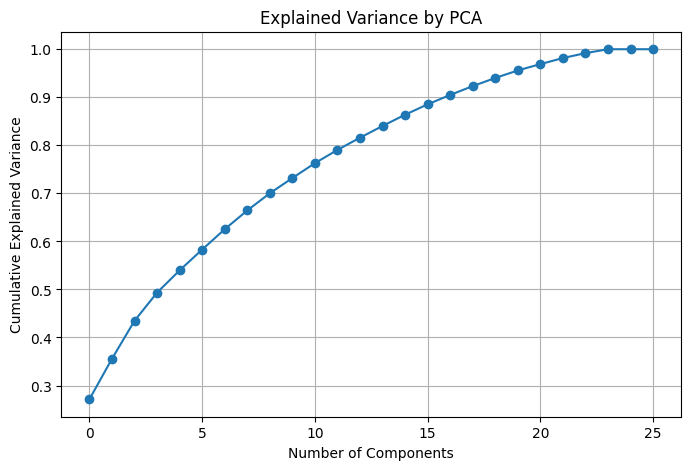

Components needed for 90% variance: 17


In [ ]:


pca = PCA()
pca.fit(scaled_data)

explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# Plot Explained Variance
plt.figure(figsize=(8,5))
plt.plot(cumulative_variance, marker='o')
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Explained Variance by PCA")
plt.grid()
plt.show()

# Find components needed for 90% variance
n_components_90 = np.argmax(cumulative_variance >= 0.90) + 1
print("Components needed for 90% variance:", n_components_90)

# Reduce dataset
pca_reduced = PCA(n_components=n_components_90)
reduced_data = pca_reduced.fit_transform(scaled_data)


In [ ]:
loadings = pd.DataFrame(
    pca_reduced.components_.T,
    columns=[f"PC{i+1}" for i in range(n_components_90)],
    index=data.columns
)

# Top contributors to PC1
print("\nTop Features contributing to PC1:")
print(loadings["PC1"].abs().sort_values(ascending=False).head())

# Top contributors to PC2
if n_components_90 >= 2:
    print("\nTop Features contributing to PC2:")
    print(loadings["PC2"].abs().sort_values(ascending=False).head())



Top Features contributing to PC1:
NumCatalogPurchases    0.318628
MntMeatProducts        0.312443
MntWines               0.306426
Income                 0.290892
NumStorePurchases      0.282799
Name: PC1, dtype: float64

Top Features contributing to PC2:
Teenhome             0.540449
NumDealsPurchases    0.458994
NumWebPurchases      0.352781
Year_Birth           0.341177
NumStorePurchases    0.212635
Name: PC2, dtype: float64


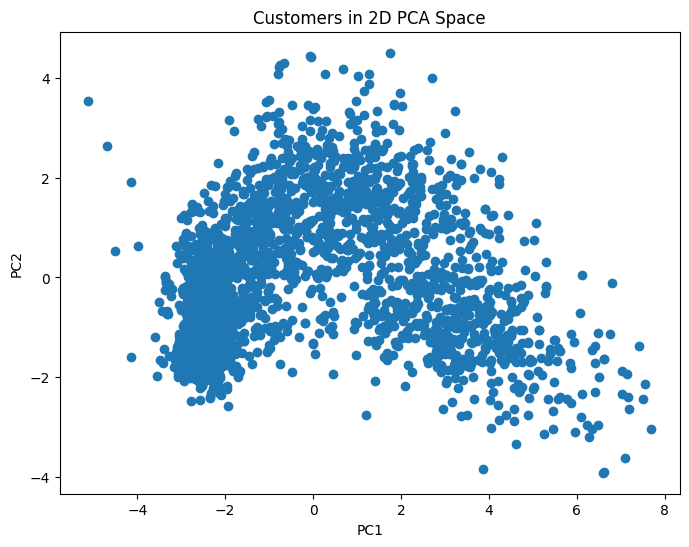

In [ ]:
pca_2d = PCA(n_components=2)
pca_2d_data = pca_2d.fit_transform(scaled_data)

plt.figure(figsize=(8,6))
plt.scatter(pca_2d_data[:, 0], pca_2d_data[:, 1])
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Customers in 2D PCA Space")
plt.show()


In [ ]:
# KMeans - Original Data

start_time = time.time()

kmeans_original = KMeans(n_clusters=4, random_state=42, n_init=10)
labels_original = kmeans_original.fit_predict(scaled_data)

time_original = time.time() - start_time
silhouette_original = silhouette_score(scaled_data, labels_original)

print("\nOriginal Data")
print("Silhouette Score:", silhouette_original)
print("Computation Time:", time_original)



Original Data
Silhouette Score: 0.17985246915340528
Computation Time: 0.10994124412536621


In [ ]:

# KMeans - PCA Reduced Data


start_time = time.time()

kmeans_pca = KMeans(n_clusters=4, random_state=42, n_init=10)
labels_pca = kmeans_pca.fit_predict(reduced_data)

time_pca = time.time() - start_time
silhouette_pca = silhouette_score(reduced_data, labels_pca)

print("\nPCA Reduced Data")
print("Silhouette Score:", silhouette_pca)
print("Computation Time:", time_pca)



PCA Reduced Data
Silhouette Score: 0.19994109728121487
Computation Time: 0.1514897346496582
